In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [3]:
for i in data:
    print(i)

data
target
target_names
images
DESCR


In [4]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
nums = data.data

In [6]:
type(nums)

numpy.ndarray

In [7]:
nums.shape

(1797, 64)

In [8]:
import matplotlib.pyplot as plt

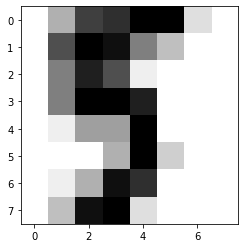

In [9]:
plt.imshow(nums[15].reshape(8,8),cmap = 'binary')

In [10]:
y = data.target

In [11]:
y.shape

(1797,)

In [12]:
x_train ,x_test,y_train,y_test = nums[:1000],nums[1000:],y[:1000],y[1000:]

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
classifier = SGDClassifier(random_state= 42)
classifier.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
classifier.score(x_test,y_test)

0.904642409033877

In [22]:
def classifier_score(model,x_train,x_test,y_train,y_test):
    classifier = model
    classifier.fit(x_train,y_train)
    return classifier.score(x_test,y_test)

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
models = [SVC(),RandomForestClassifier(),AdaBoostClassifier(),SGDClassifier(),KNeighborsClassifier()]

In [29]:
results = []
for model in models :
    results.append(classifier_score(model,x_train,x_test,y_train,y_test))
    
for i,j in enumerate(results):
    print(i+1,j*100)
    

1 95.98494353826851
2 93.2245922208281
3 26.474278544542035
4 91.96988707653702
5 95.73400250941029


In [69]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.metrics import confusion_matrix

In [81]:
classifier = RandomForestClassifier()

In [82]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_predict = classifier.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test,y_predict)

array([[78,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 71,  0,  1,  0,  1,  0,  0,  0,  7],
       [ 1,  1, 69,  3,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0, 66,  0,  2,  0,  3,  7,  1],
       [ 1,  0,  0,  0, 78,  1,  0,  2,  0,  1],
       [ 0,  1,  0,  0,  0, 79,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 79,  1,  0],
       [ 0,  5,  1,  0,  1,  2,  0,  0, 65,  2],
       [ 0,  0,  0,  2,  0,  3,  0,  0,  2, 74]], dtype=int64)